# Линейная регрессия

На сегодняшнем занятии сначала посмотрим, как работает линейная регрессия на сгенерированных данных, а потом будем работать с датасетом BlackFriday (ниже есть его описание):

https://www.kaggle.com/mehdidag/black-friday/version/1

Description
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

## Часть 1.

Сгенерируем данные для задачи регрессии (один признак и целевая переменная)

Populating the interactive namespace from numpy and matplotlib


C:\Users\elena\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


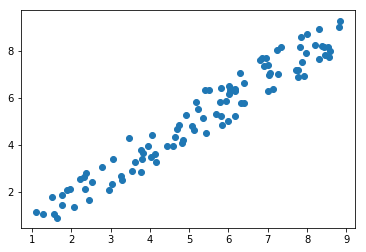

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pylab as plt
%pylab inline

num_points = 100
m, b, delta = 1, 0, 1

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x+b-delta,m*x+b+delta) for x in x])

plt.scatter(x,y)

Разобъем данные на train и test.

In [2]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((80,), (20,), (80,), (20,))

Модель линейной регрессии принимает на вход **матрицу** объект-признак (т.е. объект, имеющий две размерности). Поэтому приведем Xtrain и Xtest к виду матрицы.

In [3]:
Xtrain = Xtrain.reshape(-1,1)
Xtest = Xtest.reshape(-1,1)

Xtrain.shape, Xtest.shape

((80, 1), (20, 1))

Объявим модель и обучим её.

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(Xtrain,ytrain)

# lr.fit(матрица объект-признак, вектор ответов)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Сделаем предсказания на train и test.

In [5]:
pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

Нарисуем полученную регрессионную прямую.

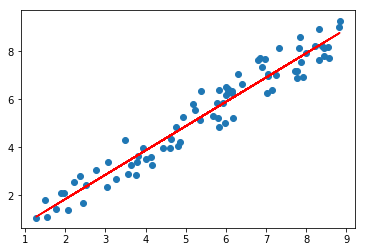

In [6]:
plt.scatter(Xtrain[:,0],ytrain)
plt.plot(Xtrain[:,0],pred_train,color='red')

Посчитаем MSE

In [7]:
from sklearn.metrics import mean_squared_error

mean_squared_error(pred_train,ytrain), mean_squared_error(pred_test,ytest)

(0.2884450010830567, 0.30245074163952446)

In [8]:
from sklearn.metrics import r2_score

r2_score(pred_train,ytrain), r2_score(pred_test,ytest)

(0.9372327904872794, 0.9366244693529298)

Хорошая ли получилась модель?

#### Задание:

1. Добавьте к исходным данным (x,y) точки (5,50) и (7,70).
2. Без разбиения на train и test обучите регрессию на всех данных.
3. Визуализируйте результат - данные и регрессионную прямую.
4. Посмотрите на метрику качества.
5. Посмотрите на веса обученной модели (model.coef_).

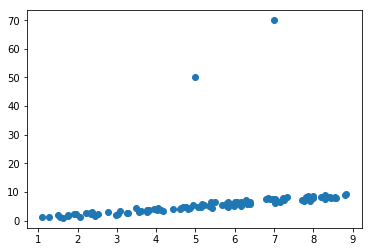

In [9]:
x = np.append(x, [5,7])
y = np.append(y, [50, 70])

plt.scatter(x,y)

In [17]:
x = x.reshape(-1,1)

In [12]:
lr.fit(x,y)

pred = lr.predict(x)

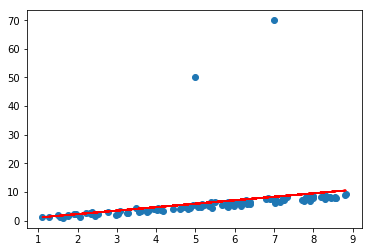

In [13]:
plt.scatter(x, y)
plt.plot(x, pred, color='red')

In [14]:
r2_score(y, pred)

0.10367337442466384

In [19]:
lr.coef_, lr.intercept_

(array([1.21052469]), -0.1757935446489327)

In [ ]:
# масштабирование

$a(x) = w_0 + w_1\cdot x_1 + w_2\cdot x_2 + \dots + w_n\cdot x_n$

$a(x) = -0.17 + 1.21x$

## Часть 2.

Теперь будем работать с табличным датасетом BlackFriday.

In [20]:
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Подготовка данных

In [21]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values * 100} %')

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


Скорее всего NaN-ы в Product_Category_2 и Product_Category_3 означают, что человек не покупал продукты из этих категорий.

**Замените все пропущенные значения на 0.**

In [22]:
data = data.fillna(0)

In [24]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


Посмотрим, какие типы данных есть в нашем датасете. 

**Выведите на экран тип каждой колонки в таблице.**

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Обработаем нечисловые колонки.

**1) Выведите на экран все возможные значения из столбца Gender.**

**2) Замените значение 'M' на 1, а 'F' на 0.**

In [26]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [27]:
data['Gender'] = data['Gender'].map({'M': 1, 'F':0})

# data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

In [28]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0.0,0.0,7969


Поработаем со столбцом Age.

**1) Выведите на экран все возможные значения из столбца Age.**

**2) Напишите функцию для перевода каждого диапазона возрастов в число (самые маленькие возрасты - 0, следующий диапазон - 1 и т.д.). Замените значения в столбце Age на числовые, применив эту функцию.**

In [29]:
data['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [32]:
'1' == '2'

False

In [33]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    return 6
    
data['Age'] = data['Age'].apply(map_age)

In [34]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,0.0,0.0,7969


Обработаем столбец City_Category.

**1) Выведите все уникальные значения данного столбца.**

**2) Закодируйте столбец с помощью OneHotEncoding (get_dummies).**

In [35]:
data['City_Category'].value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

In [37]:
data = pd.get_dummies(data, columns=['City_Category'], drop_first=True)

data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370,1,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422,1,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057,1,0,0
4,1000002,P00285442,1,6,16,4+,0,8,0.0,0.0,7969,0,0,1


Наконец, обработаем Stay_In_Current_City_Years.

**1) Выведите на экран все уникальные значения данного столбца.**

**2) Замените '4+' на 4, а все остальные значения оставьте как есть, но переведите их в числовой вид (x -> int(x)).**

In [38]:
data.Stay_In_Current_City_Years.value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

In [39]:
#your code here

def map_stay(stay):
    if stay == '4+':
        return 4
    return int(stay)
    
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map(map_stay)

data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370,1,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422,1,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057,1,0,0
4,1000002,P00285442,1,6,16,4,0,8,0.0,0.0,7969,0,0,1


In [41]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,0,0,10,2,0,3,0.0,0.0,8370,1,0,0
1,0,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,0,0,10,2,0,12,0.0,0.0,1422,1,0,0
3,0,0,10,2,0,12,14.0,0.0,1057,1,0,0
4,1,6,16,4,0,8,0.0,0.0,7969,0,0,1


**Удалите столбцы User_ID и Product_ID.**

In [40]:
del data['User_ID'], data['Product_ID']

# Исследование данных

**1. Как влияет пол на целевую переменную Purchase? Постройте диаграмму.**

**2. Как влияет возраст на целевую переменную Purchase? Постройте диаграмму.**

**3. Как влияет City_Category на целевую переменную Purchase? Постройте диаграмму.**

C:\Users\elena\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


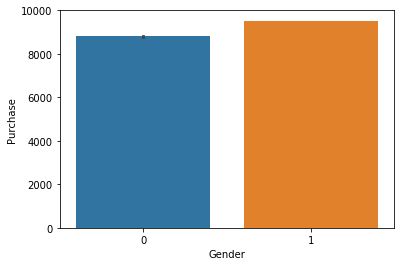

In [44]:
sns.barplot(y='Purchase', x='Gender', data=data)

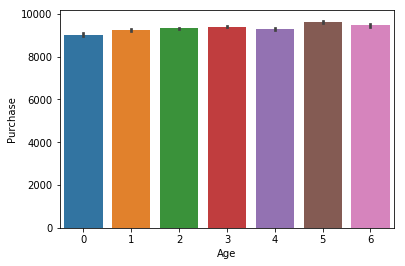

In [45]:
sns.barplot(y='Purchase', x='Age', data=data)

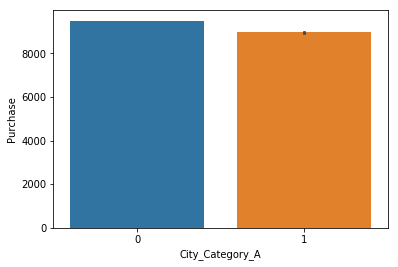

In [46]:
sns.barplot(y='Purchase', x='City_Category_A', data=data)

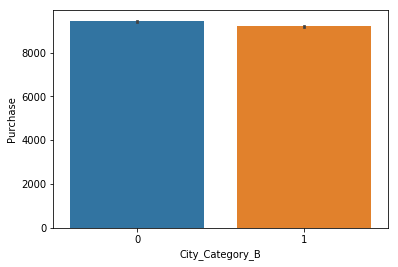

In [47]:
sns.barplot(y='Purchase', x='City_Category_B', data=data)

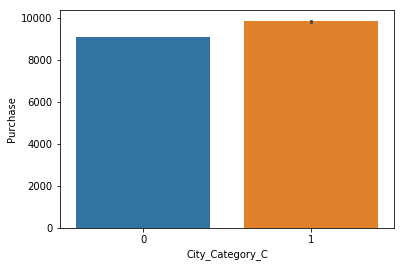

In [48]:
sns.barplot(y='Purchase', x='City_Category_C', data=data)

**Нарисуйте матрицу корреляций признаков.**

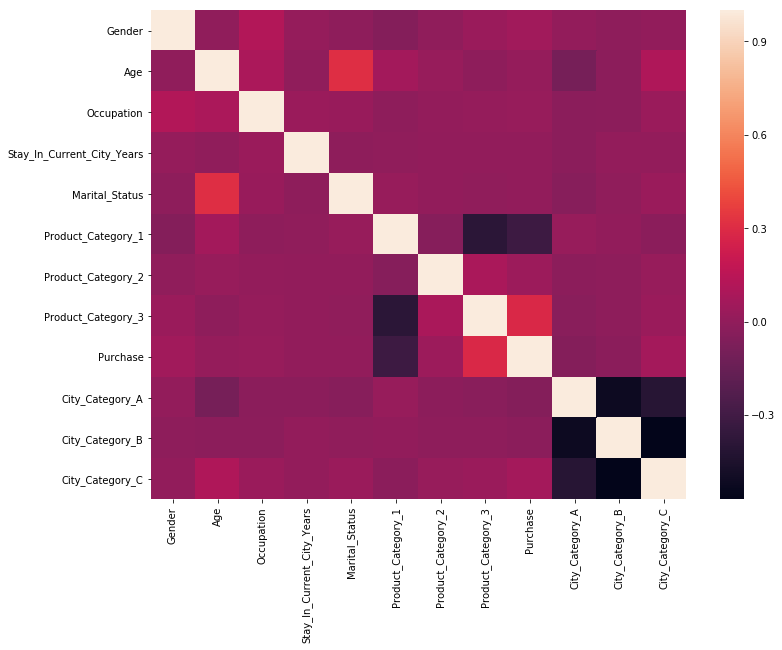

In [113]:
plt.figure(figsize=(12,9))
#your code here

mat = data.corr()

sns.heatmap(mat)

# Построение модели

Разобъем данные на train и test.

In [107]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.copy()
X['Mult'] = X['Product_Category_1'] * X['Product_Category_3']
X['Sq'] = X['Product_Category_3'] ** 2

y = data['Purchase']
del X['Purchase'], X['City_Category_A']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=0)

$$x \to \frac{x_x_{min}}{x_{max}-x_{min}}$$

In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

Xtest

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.        , 0.16666667, 0.2       , ..., 0.        , 0.03529412,
        0.25      ],
       [1.        , 0.33333333, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.83333333, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.5       , 0.35      , ..., 0.        , 0.05882353,
        0.69444444],
       [1.        , 0.83333333, 0.85      , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.16666667, 0.25      , ..., 0.        , 0.        ,
        0.        ]])

In [109]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,0,0,10,2,0,3,0.0,0.0,8370,1,0,0
1,0,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,0,0,10,2,0,12,0.0,0.0,1422,1,0,0
3,0,0,10,2,0,12,14.0,0.0,1057,1,0,0
4,1,6,16,4,0,8,0.0,0.0,7969,0,0,1


**Обучите модель на тренировочных данных и сделайте предсказание на тесте.**

In [110]:
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred = regressor.predict(Xtest)
print(ypred)

[11852.56836573  7768.49802334  8677.31342851 ... 13131.27017291
  7133.26504785  8818.20360158]


Вычислим качество модели.

In [111]:
r2_score(ytest,ypred), mean_squared_error(ytest,ypred)

(0.15727047979321251, 20898701.32086509)

**Посмотрите на веса обученной модели.**

In [76]:
regressor.intercept_, regressor.coef_

(9136.182781493122,
 array([  465.24980159,   637.76116101,   115.39629865,    50.88529703,
          -50.16317238, -5470.01966628,   153.77330197,  2651.03566183,
          170.69163959,   670.70107531]))

In [77]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Gender,465.249802
1,Age,637.761161
2,Occupation,115.396299
3,Stay_In_Current_City_Years,50.885297
4,Marital_Status,-50.163172
5,Product_Category_1,-5470.019666
6,Product_Category_2,153.773302
7,Product_Category_3,2651.035662
8,City_Category_B,170.691640
9,City_Category_C,670.701075


Посмотрим на качество модели на кросс-валидации.

In [82]:
from sklearn.model_selection import cross_val_score

cross_val_score(regressor, X, y, cv=3).mean()

0.13559483384449159

**Какую ошибку мы смотрели? Посмотрите на r2 на кросс-валидации.**

In [84]:
cross_val_score(regressor, X, y, cv=3, scoring='neg_mean_squared_error').mean()

-21446150.91248649

Добавим L1 регуляризацию.

In [86]:
from sklearn.linear_model import Lasso

regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

Scores: 0.13347536181846353 21488792.271193977
[  422.35563575   421.88406304    45.43084489     0.
    -0.         -5281.46131514    81.38988891  2626.58086693
    80.60313336   584.85856706] 



**Посмотрите на веса при различных значениях alpha.**

In [88]:
from sklearn.linear_model import Lasso

for a in np.arange(0.1,100.1,25):
    print('alpha=',a)
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha= 0.1
Scores: 0.13358512385945864 21486070.301622335
[  464.82611299   635.42613406   114.70902608    49.99643637
   -49.40701387 -5468.13530167   153.05144436  2650.79184345
   169.78983467   669.84549986] 

alpha= 25.1
Scores: 0.13237461160127983 21516089.582450088
[  351.21578057   133.61424651     0.             0.
     0.         -4994.17998817     0.          2586.06470404
     0.           487.16405755] 

alpha= 50.1
Scores: 0.1299288425401245 21576741.77972491
[  228.89857459     0.             0.             0.
     0.         -4539.90279279     0.          2501.40305235
     0.           384.55926791] 

alpha= 75.1
Scores: 0.126224172563278 21668613.239644215
[  106.76013597     0.             0.             0.
     0.         -4095.34206111     0.          2415.31047572
    -0.           274.72064023] 



**Видим, что L1-регуляризация зануляет некоторые веса и таким образом производит отбор признаков.**

Подберем оптимальное значение параметра регуляризации по кросс-валидации

In [89]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1    ,  0.14975, ...,  9.95025, 10.     ]),
    copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
    verbose=False)

In [90]:
lasso_cv.coef_

array([ 482.16976974,  103.49903741,    5.69793977,    9.52760257,
        -47.30585129, -317.88884738,    8.13663821,  148.34973621,
        145.94388277,  660.99699949])

In [91]:
lasso_cv.alpha_

0.1

In [ ]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))

**Посмотрите на веса линейной регрессии с L2-регуляризацией при различных значениях alpha.**

In [93]:
from sklearn.linear_model import Ridge

for a in np.arange(0.1,100.1,25):
    print('alpha=',a)
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('Scores:', r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_,'\n')

alpha= 0.1
Scores: 0.13358268807015217 21486130.70633343
[  465.24978308   637.75537437   115.39652286    50.88526019
   -50.16256623 -5469.98693396   153.77368449  2651.03763384
   170.69104258   670.70040649] 

alpha= 25.1
Scores: 0.1335880451630561 21485997.856727637
[  465.24495459   636.3118302    115.45236334    50.87604107
   -50.0113908  -5461.81806181   153.86919894  2651.52689196
   170.54175158   670.5330373 ] 

alpha= 50.1
Scores: 0.13359313611431745 21485871.607121687
[  465.23972505   634.87446881   115.50777962    50.86680148
   -49.86093678 -5453.67738777   153.96448521  2652.00872528
   170.39238539   670.36534112] 

alpha= 75.1
Scores: 0.1335979633233656 21485751.898012545
[  465.2340968    633.44325195   115.56277451    50.85754153
   -49.71119948 -5445.56475856   154.05954349  2652.48318383
   170.24294593   670.19732152] 



**Ridge регрессия не зануляет веса (они могут быть очень маленькими, но ненулевыми).**

Теперь подберем оптимальное a по кросс-валидации.

In [94]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000e-02, 1.09699e-02, ..., 9.11589e+05, 1.00000e+06]),
    cv=3, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [96]:
ridge_cv.alpha_

ridge_cv.coef_

array([ 482.19524677,  103.59464767,    5.69894783,    9.58286736,
        -47.76201488, -317.89137319,    8.13875764,  148.35071988,
        146.26907516,  661.04304192])

In [ ]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3 = regressor3.predict(Xtest)

print('Scores:', r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))

Добавим одновременно и L1, и L2 регуляризацию.

У ElasticNet два параметра: alpha и l1_ratio.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

**Обучите ElasticNet с любыми значениями этих параметров. Посмотрите на качество.**

In [ ]:
from sklearn.linear_model import ElasticNet

#your code here
model = ElasticNet(alpha = , l1_ratio = )

Посмотрим на веса, которые присвоила линейная регрессия признакам.

In [114]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Gender,427.611080
1,Age,638.239132
2,Occupation,103.821325
3,Stay_In_Current_City_Years,50.024440
4,Marital_Status,-48.743826
5,Product_Category_1,-3393.503295
6,Product_Category_2,759.675549
7,Product_Category_3,9399.386895
8,City_Category_B,158.389724
9,City_Category_C,634.431778


In [ ]:
len(data),len(Xtest)

# Feature Engineering*

Попробуйте соорудить новые признаки.

Идеи:

1) Группировка исходных признаков по бинам
(попробуйте сгруппировать числовые признаки, например, Product_Category_1(2,3))

2) Перемножение признаков, которые в паре могут влиять на результат (линейная регрессия не умеет умножать)

3) Взятие других функций от признаков.

In [ ]:
#your code here